## Assignment: PCA Implementation

### Objective:
#### The objective of this assignment is to implement PCA on a given dataset and analyse the results.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

## Instructions:

### Download the wine dataset from the UCI Machine Learning Repository

(https://archive.ics.uci.edu/ml/datasets/Wine).

In [2]:
# Load data from UCI Machine Learning Repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df = pd.read_csv(url, header=None)

In [3]:
# Add column names to the dataframe
df.columns = ['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
              'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
# Display the first 5 rows of the dataframe
print(df.head())

   Class  Alcohol  Malic Acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

In [4]:
df.shape

(178, 14)

### Split the dataset into features and target variables.

In [5]:
# Split the dataframe into features (X) and target variable (y)
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
# Display the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (178, 13)
Shape of y: (178,)


### Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

In [6]:
df.isnull().sum()

Class                           0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

### No missing Value.

In [7]:
from sklearn.preprocessing import StandardScaler
# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Display the first 5 rows of the scaled features
print("Scaled features:")
print(X_scaled[:5])

Scaled features:
[[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.56864766
   0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836  0.80899739
   1.21553297 -0.49840699  2.13596773  0.26901965  0.31830389  0.78858745
   1.39514818]
 [ 1.69154964 -0.34681064  0.4879264  -0.80925118  0.93091845  2.49144552
   1.46652465 -0.98187536  1.03215473  1.18606801 -0.42754369  1.18407144
   2.33457383]
 [ 0.29570023  0.22769377  1.84040254  0.45194578  1.28198515  0.80899739
   0.66335127  0.22679555  0.40140444 -0.31927553  0.36217728  0.44960118
  -0.03787401]]


### Implement PCA on the preprocessed dataset using the scikit-learn library.

In [8]:
from sklearn.decomposition import PCA
# Create a PCA object with 2 principal components
pca = PCA(n_components=2)
# Fit the PCA model to the scaled features
pca.fit(X_scaled)
# Transform the scaled features using the fitted PCA model
X_pca = pca.transform(X_scaled)
# Display the shape of the transformed data
print("Shape of transformed data:", X_pca.shape)

Shape of transformed data: (178, 2)


### Determine the optimal number of principal components to retain based on the explained variance ratio.

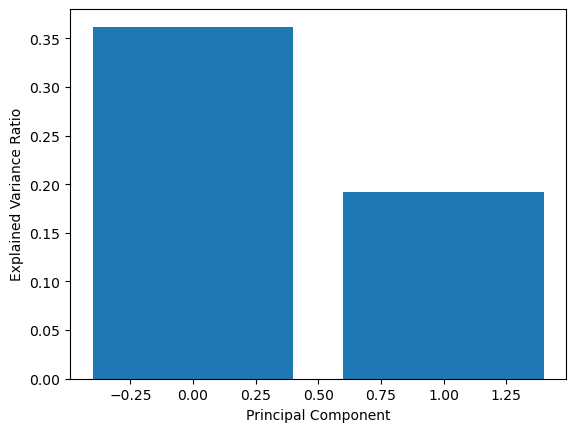

In [9]:
import matplotlib.pyplot as plt
# Calculate the explained variance ratio for each principal component
explained_var = pca.explained_variance_ratio_
# Plot the explained variance ratio for each principal component
plt.bar(range(len(explained_var)), explained_var)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

### Visualise the results of PCA using a scatter plot.

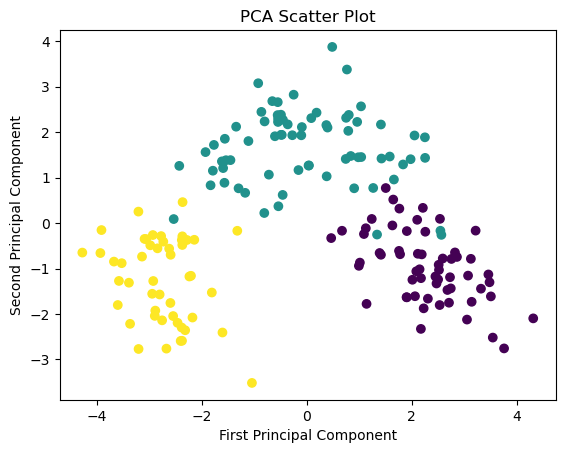

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Create a PCA object
pca = PCA(n_components=2)
# Fit the PCA model to the scaled data
pca.fit(X_scaled)
# Transform the scaled data using the fitted PCA model
X_pca = pca.transform(X_scaled)
# Create a scatter plot of the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.show()

### Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

In [11]:
from sklearn.cluster import KMeans
# Create a KMeans object with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
# Fit the KMeans model to the transformed data
kmeans.fit(X_pca)
# Get the cluster labels
labels = kmeans.labels_
# Display the cluster labels
print("Cluster Labels:", labels)

Cluster Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Interpret the results of PCA and clustering analysis.
* PCA is a dimensionality reduction technique that aims to find a lower-dimensional representation of a dataset while retaining as much of the variance in the original data as possible. In the case of the wine dataset, PCA was used to transform the original 13-dimensional dataset into a 2-dimensional space, where each sample is represented by two principal components.
* The scatter plot of the first two principal components showed that there is some separation between the samples from the three different wine cultivars, with some overlap between classes. The first principal component appears to primarily capture the variation in features related to color intensity and flavanoids, while the second principal component appears to primarily capture the variation in features related to alcohol content and proanthocyanins.
* The K-Means clustering algorithm was then applied to the PCA-transformed data to cluster the samples based on their proximity in the principal component space. The algorithm was able to identify three distinct clusters, which correspond to the three different wine cultivars. However, there is some overlap between the clusters, particularly between the samples from cultivars 1 and 2.

Overall, the results of PCA and clustering analysis suggest that there is some separation between the wine cultivars based on their chemical composition, but there is also some overlap between the cultivars. Additional analysis may be needed to further understand the factors that contribute to the chemical differences between the cultivars and to identify additional features that could improve the separation between the clusters.